In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Task 1: maximum likelihood fit (3 points)

Let's generate a Gaussian mixture dataset and then fit its parameters with maximum likelihood.

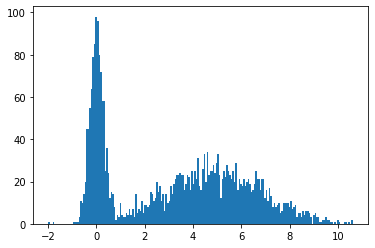

In [3]:
X1 = np.random.normal(size=1000, scale=0.3).astype('float32')
X2 = np.random.normal(size=2000, loc=5., scale=2.).astype('float32')

X = np.concatenate([X1, X2])
np.random.shuffle(X)

plt.hist(X, bins=200);

**Task**:
 - fill the gaps below to perform the max. likelihood fit with the pdf:
$$\text{PDF}(x|\mu_1, \sigma^2_1, \mu_2, \sigma^2_2, \alpha)
= \alpha\cdot\mathscr{N}(x|\mu_1, \sigma_1^2) + (1 - \alpha)\cdot\mathscr{N}(x|\mu_2, \sigma_2^2)$$
 - what the fitted values of $\mu_1, \sigma^2_1, \mu_2, \sigma^2_2$ and $\alpha$ should be? does your fit converge to them?

None


<>:24: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:25: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:26: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:24: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:25: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:26: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:24: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:25: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:26: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-44-fa4ff953a031>:24: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (s1 > 1e-5, f"s1 not positive, got: {s1}")
<ipython-input-44-fa4ff953a031>:25: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (s2 > 1e-5, f"s2 not positive, got: {s2}")
<i

TypeError: ignored

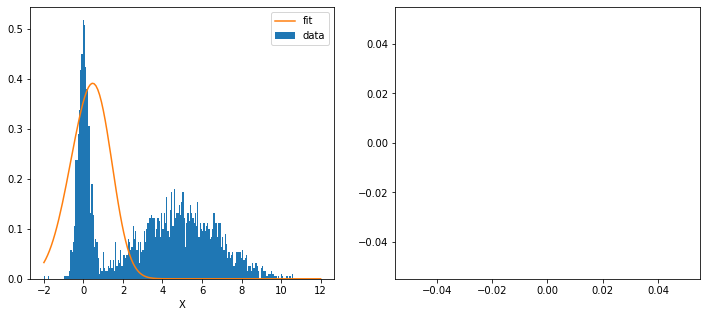

In [44]:
from IPython.display import clear_output

# Defining Gaussian PDF using torch functions
def gaussian(x, mu, sigma):
  tmp = torch.from_numpy(x)
  return torch.exp(-0.5 * torch.pow((tmp-mu)/sigma,2))/(sigma * np.sqrt(2*torch.pi))
  #return torch.nn.functional.normalize(torch.exp(-0.5 * torch.pow((tmp-mu)/sigma,2))/(sigma * np.sqrt(2*torch.pi)),p =2 , dim =0 )
  #<YOUR CODE> # use torch.exp for the exponent, don't forget the normalization

# Arbitrary mixture PDF
def mixture(x, f1, f2, alpha):
  return alpha * f1(x) + (1. - alpha) * f2(x)

# Parameters that we'd like to infer (with an initial guess)
# m1    = torch.Tensor([1.0])
# m2    = torch.Tensor([4.0])
# s1    = torch.Tensor([1.0])
# s2    = torch.Tensor([1.0])
# alpha = torch.Tensor([0.5])

# At each gradient update we'll apply this function to
# ensure valid parameter values
def apply_constraints():
  assert (s1 > 1e-5, f"s1 not positive, got: {s1}")
  assert (s2 > 1e-5, f"s2 not positive, got: {s2}")
  assert (alpha > 0 and alpha < 1, f"alpha not in [0,1], got: {s1}")
  #<YOUR CODE> # ensure the sigmas are positive (greater or equal to some small
              # positive number, e.g. 1e-5) and alpha is in (0, 1) interval

m1    = torch.rand(1)
m2    = torch.rand(1)
s1    = torch.rand(1)
s2    = torch.rand(1)
alpha = torch.rand(1)


variables = [m1, m2, s1, s2, alpha]

# Defining the overall PDF
def model_pdf(x):
  return mixture(x,
                 lambda t: gaussian(t, m1, s1),
                 lambda t: gaussian(t, m2, s2),
                 alpha)

# Log likelihood
def loglike(x):
  tmp = torch.from_numpy(x)
  print (tmp.grad)
  grad_history.append(tmp.grad)
  return  - tmp.log().mean()
  #return  - log(x.grad).mean()
  # y_grid = model_pdf(x_grid)
  # loss = torch.nn.NLLLoss()
  # #tmp = torch.from_numpy(x)
  # output = loss(y_grid, tmp)
  # return output
  # # <YOUR CODE> 
  # return nn.GaussianNLLLoss()

learning_rate = 0.0001
grad_history = [] # to keep track of gradient values at different steps

for i in range(30):
  # Forward pass:
  l = loglike(X)

  #l.backward()
  # Backprop
  # Gradient ascent step
  apply_constraints()
  ############################
  # Do some plotting
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.hist(X, bins=200, density=True, label='data')
  x_grid = np.linspace(-2, 12, 150)
  plt.plot(x_grid, model_pdf(x_grid), label='fit')
  plt.legend()
  plt.xlabel('X')

  plt.subplot(1, 2, 2)
  lines = plt.plot(np.array(grad_history))
  low = min(grad_history[-1])
  high = max(grad_history[-1])
  plt.ylim(low  - (high - low) * 0.6,
           high + (high - low) * 0.6)
  plt.legend(lines, ['m1', 'm2', 's1', 's2', 'alpha'])
  plt.xlabel('step')
  plt.ylabel('gradient')
  plt.show()
  clear_output(wait=True);

# Task 2: classifying clothes (3 points)

In [2]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))
                               ])

# Download and load the training data
trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

[['T-shirt/top' 'T-shirt/top' 'Trouser' 'Sandal' 'Trouser' 'Ankle boot'
  'Sneaker' 'Sandal']
 ['Coat' 'Ankle boot' 'Trouser' 'Pullover' 'Shirt' 'Shirt' 'T-shirt/top'
  'Ankle boot']
 ['Trouser' 'Dress' 'Sandal' 'Pullover' 'Sandal' 'Ankle boot'
  'T-shirt/top' 'Pullover']
 ['Sneaker' 'Bag' 'T-shirt/top' 'T-shirt/top' 'Pullover' 'Pullover'
  'Sandal' 'T-shirt/top']
 ['Dress' 'Shirt' 'Sneaker' 'Shirt' 'Sandal' 'Ankle boot' 'Bag'
  'Ankle boot']
 ['Trouser' 'Bag' 'Dress' 'Coat' 'Coat' 'Pullover' 'Sandal' 'Ankle boot']
 ['Shirt' 'Trouser' 'Ankle boot' 'Dress' 'Ankle boot' 'Shirt' 'Sneaker'
  'Pullover']
 ['Ankle boot' 'Dress' 'Trouser' 'Dress' 'Trouser' 'Sneaker' 'Sneaker'
  'Dress']]


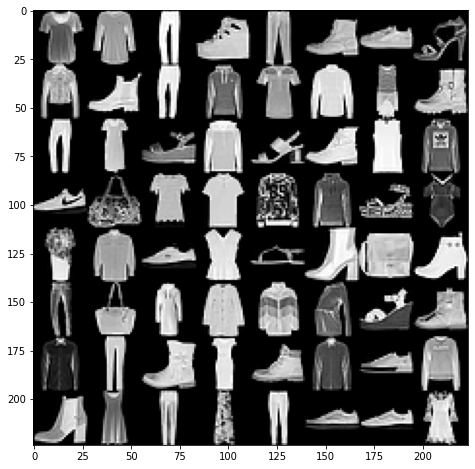

In [3]:
# Array for decoding the categories
label_names = np.array(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle boot'])

# Get a single data batch of 64 images
sample_images, sample_labels = next(iter(trainloader))

# Plot the images in a 8x8 grid
plt.figure(figsize=(8, 8))
plt.imshow(
    sample_images.numpy().reshape(8, 8, 28, 28).transpose((0, 2, 1, 3)).reshape(224, 224),
    cmap='gray'
)
# Print corresponding labels
print(label_names[sample_labels.numpy().reshape(8, 8)])

**Task**:

Train a model which is an average of two models with different numbers of layers on the Fashion MNIST dataset, e.g.:

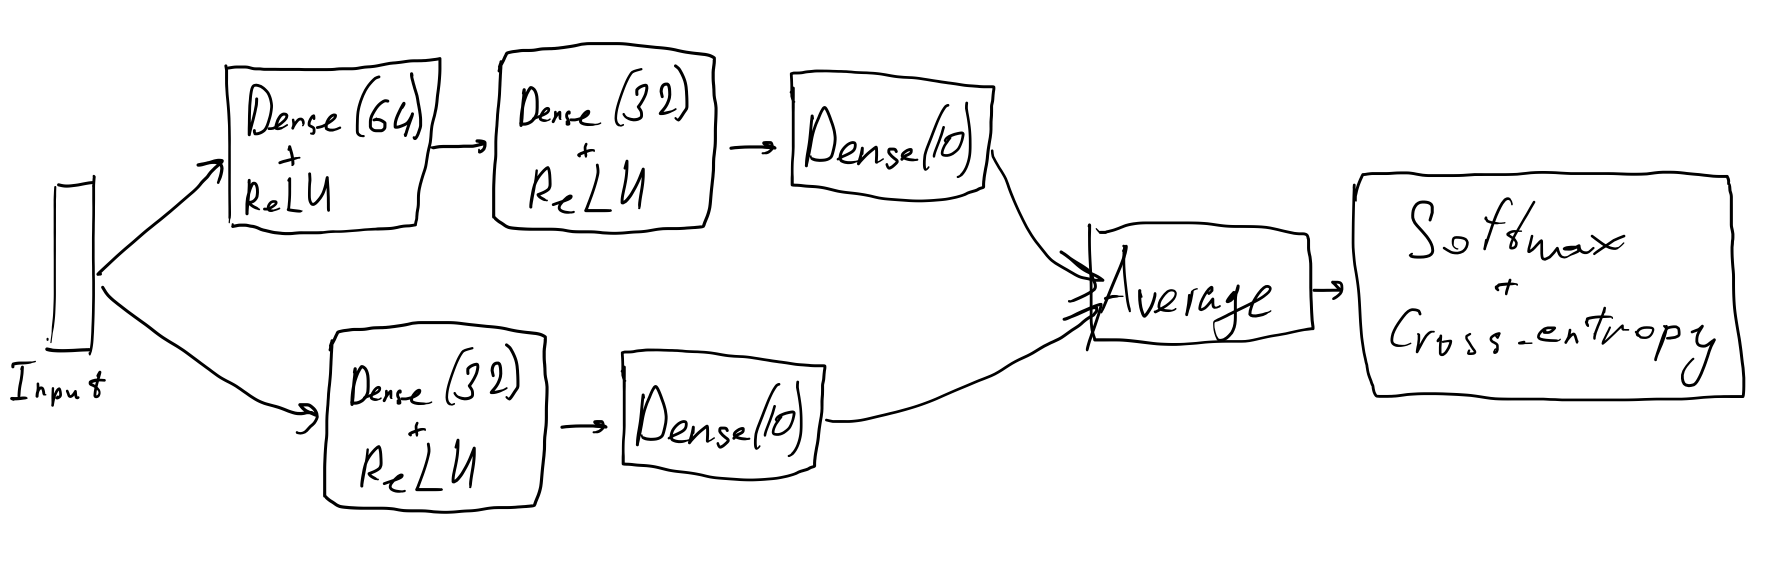

In [4]:
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function
import torch.optim as optim

In [5]:
first_net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=28*28, out_features=32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

In [6]:
second_net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=28*28, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

In [7]:
loss = nn.CrossEntropyLoss()
opt1 = optim.SGD(first_net.parameters(), lr=0.001, momentum=0.9)
opt2 = optim.SGD(second_net.parameters(), lr=0.001, momentum=0.9)

In [17]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')

In [18]:
first_net.to(my_device)
second_net.to(my_device)
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        opt1.zero_grad()
        opt2.zero_grad()
        # forward + backward + optimize
        outputs1 = first_net(inputs.to(my_device))
        outputs2 = second_net(inputs.to(my_device))
        output = torch.add(outputs1, outputs2)
        avg_output = torch.div(output, 2)
        soft_max_output = F.softmax(avg_output)
        lo1 = loss(soft_max_output, labels.to(my_device))
        lo1.backward()
        opt1.step()
        opt2.step()

        
      
print('Finished Training')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Finished Training


In [19]:
correct = 0 
total = 0 
with torch.no_grad():
  for data in testloader:
    input , labels = data
    outputs1 = first_net(input)
    outputs2 = second_net (input)
    output = torch.add(outputs1, outputs2)
    avg_output = torch.div(output, 2)
    soft_max_output = F.softmax(avg_output)
    _ , predicted = torch.max(soft_max_output , 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Accuracy of the network on the 10000 test images: 74 %
